# Setting up stuff

In [1]:
# all stuff to set up in your browser
import piplite
import micropip
# 
await piplite.install("py4DSTEM==0.14.8", deps=False); await piplite.install("pylops");await piplite.install("emdfile");await piplite.install("ncempy");await piplite.install("dask");await micropip.install("colorspacious");await micropip.install("hdf5plugin");await micropip.install("gdown");await micropip.install("scikit-image");await piplite.install("scikit-optimize");

# The Main Functions

In [2]:
import py4DSTEM
import matplotlib.pyplot as plt
import numpy as np

# Define fcc gold structure using manual input of the crystal structure
pos = [
    [0.0, 0.0, 0.0],
    [0.0, 0.5, 0.5],
    [0.5, 0.0, 0.5],
    [0.5, 0.5, 0.0],
]
atom_num = 79
a = 4.08
cell = a

crystal = py4DSTEM.process.diffraction.Crystal(
    pos, 
    atom_num, 
    cell)

# Plot the structure
crystal.plot_structure(
    zone_axis_lattice=[5,3,1],
    figsize=(4,4),
)

# Calculate and plot the structure factors

k_max = 2.0   # This is the maximum scattering vector included in the following calculations
# k_max = 6.0

crystal.calculate_structure_factors(k_max)

crystal.plot_structure_factors(
    zone_axis_lattice=[3,2,1],
    figsize=(4,4),
)

# specify the accelerating voltage
crystal.setup_diffraction(300e3)

zone_axis_test = [0,1,3]  # Zone axis
# zone_axis_test = [0,0,1]  # Zone axis
# x_proj_test = [1,0,0]  # in-plane projection vector

bragg_peaks = crystal.generate_diffraction_pattern(
    zone_axis_lattice = zone_axis_test,
    # proj_x_lattice = x_proj_test,
    sigma_excitation_error=0.02
)

py4DSTEM.process.diffraction.plot_diffraction_pattern(
    bragg_peaks,
    # add_labels=False,
    figsize=(4,4),
    shift_labels=0.2,
)

# Create an orientation plan with an automatic range of zone axes - this requires pymatgen to be installed!
crystal.orientation_plan()

# crystal.orientation_plan(
#     angle_step_zone_axis = 2.0,
#     angle_step_in_plane = 2.0,
#     accel_voltage = 300e3,
#     corr_kernel_size=0.08,
#     zone_axis_range='auto',
#     # zone_axis_range=np.array([
#     #     [0,0,1],
#     #     [0,1,0],
#     #     [1,0,0],
#     # ]),
# )

# Plot the zone axes included in the orientation plan
crystal.plot_orientation_zones(
    figsize = (4,4),    
)


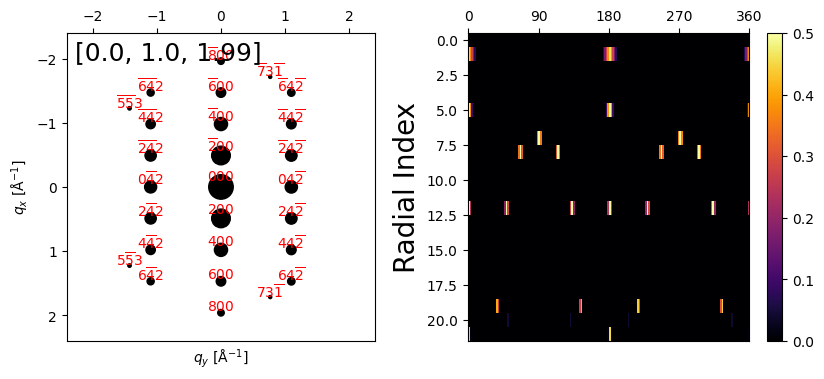

Input lattice zone axis      = ([0.267 0.535 0.802])
Best fit zone axis (lattice) = ([0.258 0.541 0.801]), with corr value = 2.132


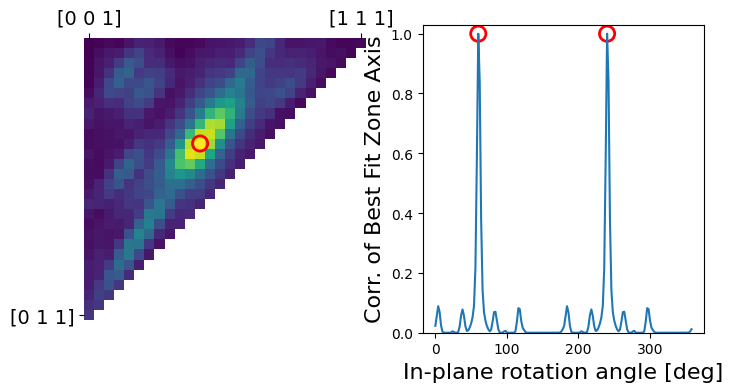

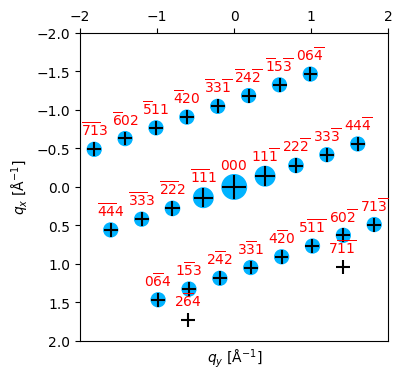

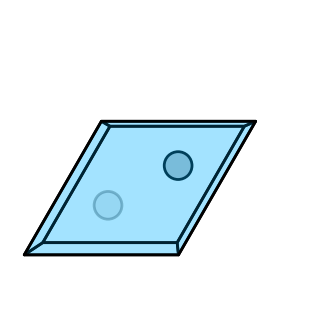

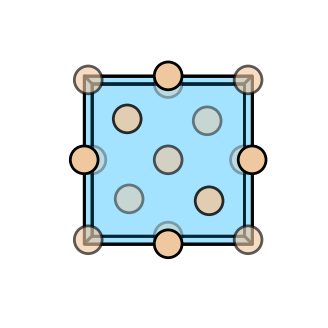

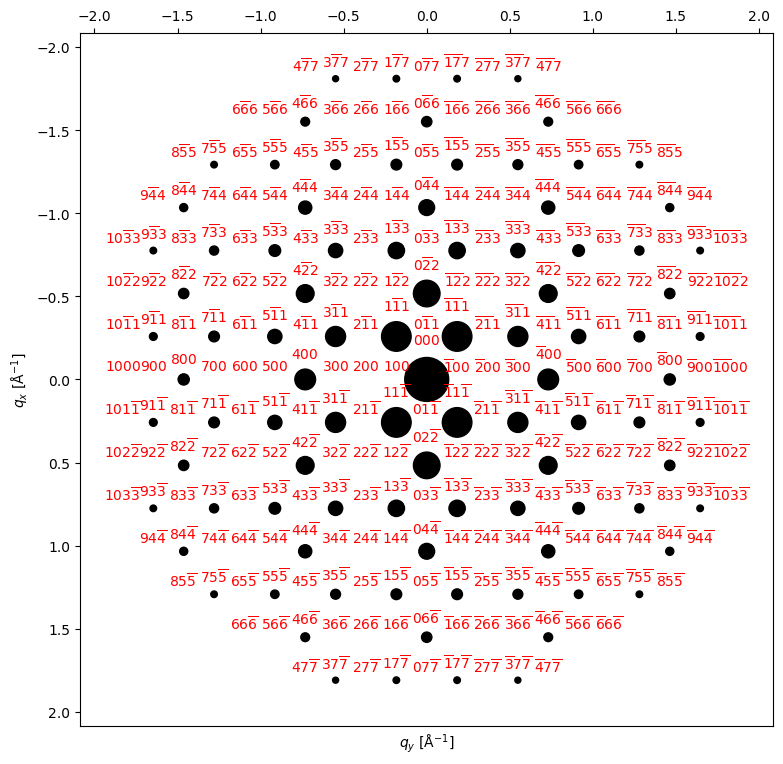

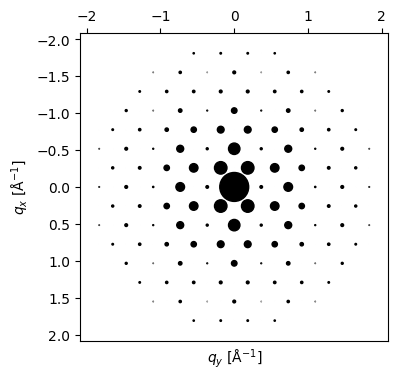

49it [00:17,  2.77it/s]


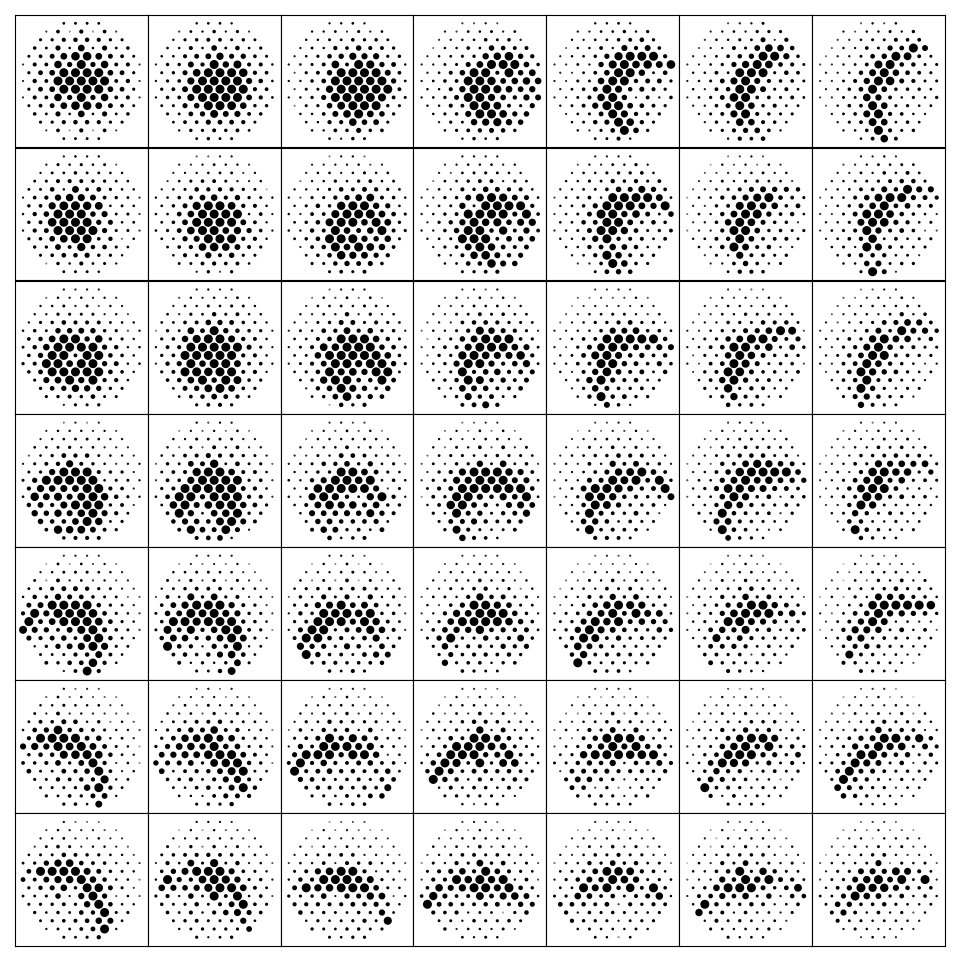

In [3]:
# Plot some of the orientation plans
crystal.plot_orientation_plan(
    zone_axis_lattice = [0,1,2],
    figsize = (10,4),
);

# Testing some matches - this cell shows the orientation correlogram, and the best match for both zone axis and in-plane rotation.
# The input diffraction pattern is shown as blue circles, and the best fit as black crosses.

zone_axis_test = [1,2,3]
# zone_axis_test = [0.25,0.983,0.1345]
# zone_axis_test = [-1,-2,-3]
# zone_axis_test = [0.2,0.4,0.7]

proj_x_test = [-0.24,0.56,0]

bragg_peaks = crystal.generate_diffraction_pattern(
    zone_axis_lattice = zone_axis_test,
    proj_x_lattice = proj_x_test,
    sigma_excitation_error=0.02)

# Print out zone axes after normalization
zone_axis_lattice = crystal.cartesian_to_lattice(zone_axis_test)
print('Input lattice zone axis      = ([' +
      f'{zone_axis_lattice[0]:.{3}f}' + ' ' +
      f'{zone_axis_lattice[1]:.{3}f}' + ' ' +
      f'{zone_axis_lattice[2]:.{3}f}' + '])'
)

# Perform matching, and plot correlation images
orientation, fig, ax = crystal.match_single_pattern(
    bragg_peaks,
    figsize=(8,4),
    plot_corr=True,
    verbose=True,
    returnfig=True,
)

# plot the match overlaid onto the input data
bragg_peaks_fit = crystal.generate_diffraction_pattern(
    orientation,
    sigma_excitation_error=0.03)
py4DSTEM.process.diffraction.plot_diffraction_pattern(
    bragg_peaks_fit,
    bragg_peaks_compare=bragg_peaks,
    min_marker_size=100,
    plot_range_kx_ky=[k_max,k_max],
    figsize=(4,4),
    shift_labels = 0.2,
)


import numpy as np

# Define titanium structure using manual input of the crystal structure
pos = np.array([
    [1/3, 2/3, 0.25],
    [2/3, 1/3, 0.75],
])

atom_num = 22

a = 2.95
c = 4.69
alpha = 90.0
gamma = 120.0

cell = [a,a,c,alpha,alpha,gamma]

crystal = py4DSTEM.process.diffraction.Crystal(
    pos, 
    atom_num, 
    cell)

# Plot the structure
crystal.plot_structure(
#     zone_axis_lattice=[0,0,1],
    camera_dist=7,
    figsize=(4,4),
)

crystal.rational_ind( crystal.lattice_to_hexagonal([1,4,3]))

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R
from tqdm import tqdm


# Si = py4DSTEM.process.diffraction.Crystal.from_pymatgen_structure("mp-149")
# https://materialsproject.org/materials/mp-149/ – Silicon, diamond cubic

Si = py4DSTEM.process.diffraction.Crystal(
    positions=[
        [0.25, 0.75, 0.25],
        [0.0,  0.0,  0.5],
        [0.25, 0.25, 0.75],
        [0.0,  0.5,  0.0],
        [0.75, 0.75, 0.75],
        [0.5,  0.0,  0.0],
        [0.75, 0.25, 0.25],
        [0.5,  0.5,  0.5],
    ],
    numbers=14,
    cell=5.468728,
)

Si.plot_structure(figsize=(4,4))

# Calculate structure factors. In order to observe kinematically forbidden reflections,
# we need to include reciprocal lattice points where V_g = 0 in the list of beams for the Bloch method,
# so we set tol_structure_factor to zero.
Si.calculate_structure_factors(k_max=4.0, tol_structure_factor=-1.0)

# Convert the V_g to relativistic-corrected U_g and store in a datastructure optimized
# for access by the Bloch code
Si.calculate_dynamical_structure_factors(
    300e3, "WK-CP", k_max=4.0, thermal_sigma=0.08, tol_structure_factor=-1.0
)

ZA = np.array([0, 1, 1])  # Use the (011) zone axis

# Generate a kinemaical diffraction pattern, which will set which beams are included in
# the dynamical matrix. To include forbidden reflections, set the intensity tolerance to 0
# and use k_max to limit the number of beams.
beams = Si.generate_diffraction_pattern(
    zone_axis_lattice=ZA, 
    sigma_excitation_error=0.02,
    tol_intensity=0.0, 
    k_max=2,
)

# Check how many beams we are going to include. Around 100-200 is the sweet spot
# where accuracy will be high but computation time will be low.
beams.data.shape

py4DSTEM.process.diffraction.plot_diffraction_pattern(
    beams,
    scale_markers=4e3,
    add_labels=True,
    figsize=(9,9)
)

# Generate a dynamical diffraction pattern, at the specified thickness.# 
# The dynamical pattern will contain the same diffraction spots as `beams`, but
# the intensities now accurately include multiple scattering and absorption!

# note for example the 200 and -200 beams now have some intensity due to multiple scattering (for the [011] zone axis).

thickness = 50.  # Ångström - feel free to tweak this


pattern = Si.generate_dynamical_diffraction_pattern(
    beams=beams, 
    thickness=thickness, 
    zone_axis_lattice=ZA,
)

py4DSTEM.process.diffraction.plot_diffraction_pattern(
    pattern,
    scale_markers = 5e2,
    power_markers = 1,
    add_labels=False,
    figsize = (4,4)
)

# Two rotation axes (perpendicular to the zone axis and to each other)
# axes for [111] ZA
rot_axis_a = [-1, -1, 2]
rot_axis_b = [-1, 1, 0]

# axes for [001] ZA
# rot_axis_a = [0, 1, 0]
# rot_axis_b = [-1, 0, 0]

# Amount to rotate along each axis
rot_a = 40.0  # milliradians (1° ≈ 17 mrad)
rot_b = 40.0  # milliradians

# Number of tilt steps
N_tilt = 7

# thickness
thickness_compare = 400

# Generate the grid of tilt values
tilt_a, tilt_b = np.meshgrid(
    np.linspace(0, rot_a, N_tilt), np.linspace(0, rot_b, N_tilt)
)

fig, ax = plt.subplots(N_tilt, N_tilt, figsize=(12, 12.1))

# Normalize the rotation axes:
rot_axis_a = np.array(rot_axis_a) / np.linalg.norm(rot_axis_a)
rot_axis_b = np.array(rot_axis_b) / np.linalg.norm(rot_axis_b)

# Loop over all the tilt values and the subplots together:
for ta, tb, a in tqdm(zip(tilt_a.flat, tilt_b.flat, ax.flat)):

    # Generate the rotations
    Ra = R.from_rotvec(ta / 1000.0 * rot_axis_a)
    Rb = R.from_rotvec(tb / 1000.0 * rot_axis_b)

    # Rotate the original zone axis
    tiltedZA = (Ra * Rb).apply(ZA)

    # Generate a dynamical diffraction pattern for this tilt
    pattern = Si.generate_dynamical_diffraction_pattern(
        beams=beams, thickness=thickness_compare, zone_axis_lattice=tiltedZA
    )

    # Plot the pattern in the correct axes in the figure
    py4DSTEM.process.diffraction.plot_diffraction_pattern(
        pattern,
        scale_markers=500,
        input_fig_handle=(fig, (a,)),
        # plot_range_kx_ky=(1.6,1.6),
        add_labels=False,
        max_marker_size = 30,
    )
    # a.axis('off')
    a.get_xaxis().set_ticks([])
    a.get_yaxis().set_ticks([])
    a.set_xlabel(None)
    a.set_ylabel(None)
    
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()